# Analisis Sederhana Formasi CASN 2024

## Import Library And Data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_formasi = pd.read_csv('formasiCleaned.csv')
df_pendidikan = pd.read_csv('pendidikanCleaned.csv')

In [4]:
df_formasi = df_formasi.dropna(subset=['formasi_id'])

## Jumlah Formasi

### Jumlah Formasi Berdasarkan Instansi

C:\Users\Hendra Kusuma\AppData\Local\Temp\ipykernel_17432\2625326160.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sumFormasiByInstansi = df_formasi.groupby('ins_nm').sum()


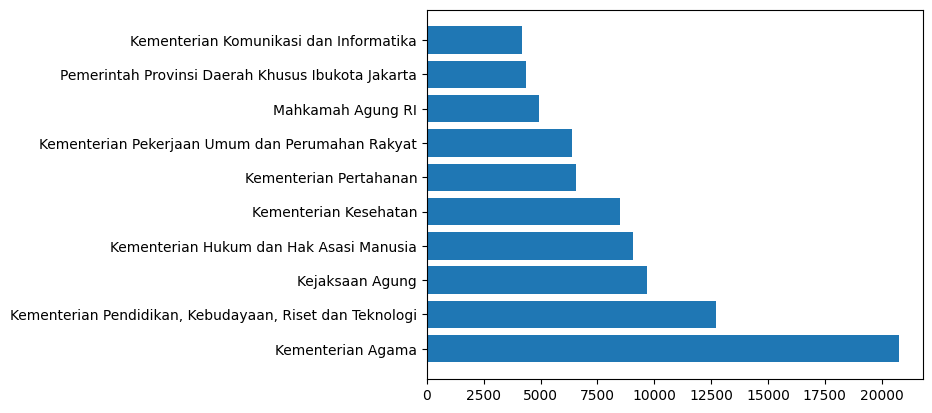

In [20]:
sumFormasiByInstansi = df_formasi.groupby('ins_nm').sum()
sumFormasiByInstansi = sumFormasiByInstansi.sort_values(by='jumlah_formasi', ascending=False)
sumFormasiByInstansi.to_csv('output/sumFormasiByInstansi.csv')
plt.barh(sumFormasiByInstansi.index[:10], sumFormasiByInstansi['jumlah_formasi'][:10])
sumFormasiByInstansi = sumFormasiByInstansi['jumlah_formasi'][:10]
sumFormasiByInstansi = sumFormasiByInstansi.reset_index()
sumFormasiByInstansi.columns = ['name', 'value']
sumFormasiByInstansi.to_json('output/web/sumByInstansi.json', orient='records')

### Jumlah Formasi Berdasarkan Jabatan

C:\Users\Hendra Kusuma\AppData\Local\Temp\ipykernel_17432\16428852.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sumFormasiByJabatan = df_formasi.groupby('jabatan_nm').sum()


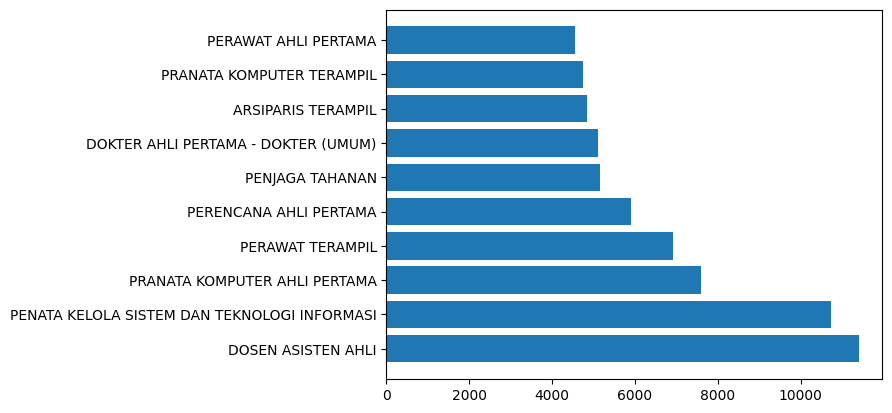

In [21]:
sumFormasiByJabatan = df_formasi.groupby('jabatan_nm').sum()
sumFormasiByJabatan = sumFormasiByJabatan.sort_values(by='jumlah_formasi', ascending=False)
sumFormasiByJabatan.to_csv('output/sumFormasiByJabatan.csv')
plt.barh(sumFormasiByJabatan.index[:10], sumFormasiByJabatan['jumlah_formasi'][:10])
sumFormasiByJabatan = sumFormasiByJabatan['jumlah_formasi'][:10]
sumFormasiByJabatan = sumFormasiByJabatan.reset_index()
sumFormasiByJabatan.columns = ['name', 'value']
sumFormasiByJabatan.to_json('output/web/sumByJabatan.json', orient='records')

### Jumlah Formasi Berdasarkan Pendidikan

In [22]:
i=1
for cepat_kode in df_pendidikan['cepat_kode']:
    filteredFormasi = df_formasi[df_formasi['kode_ref_pend'].str.contains(str(cepat_kode))]
    sum = filteredFormasi['jumlah_formasi'].sum()
    df_pendidikan.loc[df_pendidikan['cepat_kode'] == cepat_kode, 'jumlah_formasi'] = sum
    i+=1

C:\Users\Hendra Kusuma\AppData\Local\Temp\ipykernel_17432\902711514.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sumFormasiByPendidikan = sumFormasiByPendidikan[{'nama', 'jumlah_formasi'}]


<BarContainer object of 10 artists>

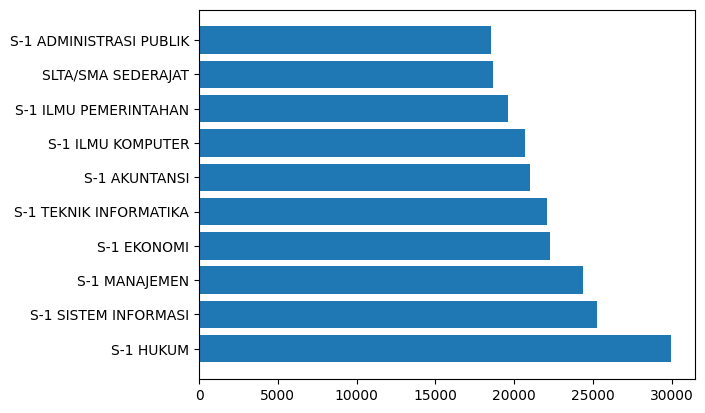

In [39]:
sumFormasiByPendidikan = df_pendidikan.sort_values(by='jumlah_formasi', ascending=False)
sumFormasiByPendidikan.to_csv('output/sumFormasiByPendidikan.csv')
sumFormasiByPendidikan = sumFormasiByPendidikan[{'nama', 'jumlah_formasi'}]
# change nama to name and jumlah_formasi to value
sumFormasiByPendidikan.columns = ['name', 'value']
sumFormasiByPendidikan = sumFormasiByPendidikan[:10]
sumFormasiByPendidikan.to_json('output/web/sumByPendidikan.json', orient='records')
plt.barh(sumFormasiByPendidikan['name'], sumFormasiByPendidikan['value'])

## Salary

### Salary Berdasarkan Instansi